* **matplotlib 버전 업**

In [1]:
# matplotlib 최신 버전 (3.5.x) 반영
!pip install matplotlib -U

# 설치 후 런타임 재시작

  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4


* **visualization setting**

In [3]:
# visualization settings
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("colorblind")

# Design of Experiment
> [Design of Experiments (DOE) with python](https://medium.com/mlearning-ai/design-of-experiments-doe-with-python-be88f5c013f5#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImY0NTEzNDVmYWQwODEwMWJmYjM0NWNmNjQyYTJkYTkyNjdiOWViZWIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2Njc0NDIyMTIsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwMzk2Mzg3ODIyNzgyNzI2MTk1MSIsImVtYWlsIjoiamVoeXVuLmxlZUBnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IkplaHl1biBMZWUiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUxtNXd1MVEyUG1sNm05TUphNGl1WmM5MDVPSWNLS3pyNHgzUWpDUlZMOGo9czk2LWMiLCJnaXZlbl9uYW1lIjoiSmVoeXVuIiwiZmFtaWx5X25hbWUiOiJMZWUiLCJpYXQiOjE2Njc0NDI1MTIsImV4cCI6MTY2NzQ0NjExMiwianRpIjoiODcxYTBhYTljNTA0YTRiMWRjOGE2ZjU2ZTA1YzhmMzNhODU3NGZkNCJ9.kQhrj_yjZ6EK2271BWC4yA9EiMqBaKBLU8i3c8AM6w9vxDtVeunLB6_Zcd_AcnfwKEPefMhe2ccjrU0-3LAmLxy6p-zhWknaeI-bklZdVQEhtw288nO_rq7btR_NbWOFAqhjlC7L0uf3HKGYJ1bySLWrhEgReP7a9diTNODijLBa33o3Rk5v15ChoSBR2LiJNP12-VeRjkwRicxPwGBgJvqIqoH5UgcLekhxxcfRF-ZJw8qWr-l8zkZez5JlRjlmeVgwOJhpZQSwv9CeMRmcl9MaJI19QEC9utK_-CMPPL8R3Dy10yG3K6GHUnevn3_6HXfD4lgkxaCQIh93gB1Fnw)  
> https://bit.ly/3sV3Y0Q


In [6]:
#!pip install pyDOE2

## problem definition

* **boiling water:** minimize **price** or **time** or **both**
> Heater settings (low/high)  
> Pot type (metal/glass)  
> Lid (with/without)  
> Heater Kind (gas/electric)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 1st experiment
* **gardening:** what is the effects of the **light** and **watering** to **height**?
> light (on/off)  
> watering (low/high)  
> height (numerical)

In [23]:
light = ["on", "off"]
watering = ["low", "high"]

# create combinations
experiments = [(x, y) for x in light for y in watering]
df_exp = pd.DataFrame(experiments, columns=["light", "watering"])
df_exp

,light,watering
0,on,low
1,on,high
2,off,low
3,off,high


In [25]:
# categorical values to numerical ones

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[["off", "on"], ["low", "high"]])
enc.fit_transform(df_exp)

array([[1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.]])

In [27]:
df_enc = pd.DataFrame(enc.fit_transform(df_exp), columns=["light", "watering"])
df_enc

,light,watering
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0


In [29]:
# randomize the order of the experiments

df_enc["exp_order"] = np.random.choice(np.arange(4), 4, replace=False)
df_enc

,light,watering,exp_order
0,1.0,0.0,1
1,1.0,1.0,2
2,0.0,0.0,3
3,0.0,1.0,0


### 1.1. No Interaction

In [32]:
df_enc["height"] = [55, 65, 25, 37]
df_enc

,light,watering,exp_order,height
0,1.0,0.0,1,55
1,1.0,1.0,2,65
2,0.0,0.0,3,25
3,0.0,1.0,0,37


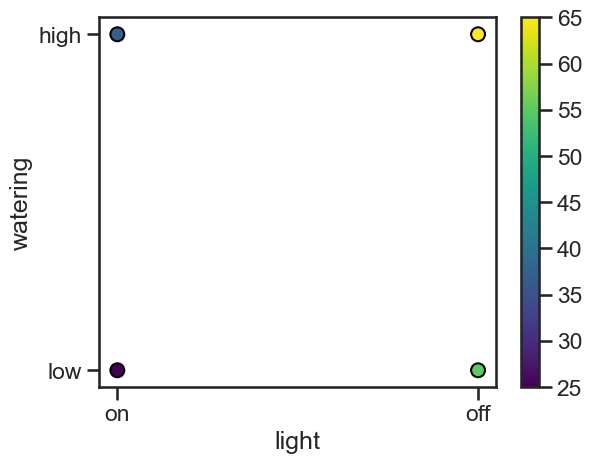

In [34]:
fig, ax = plt.subplots()
im = ax.scatter(df_enc["light"], df_enc["watering"], c=df_enc["height"], cmap="viridis", ec="k", s=100)
ax.set(xticks=[0, 1], xticklabels=light, xlabel="light")
ax.set(yticks=[0, 1], yticklabels=watering, ylabel="watering")
plt.colorbar(im)

# baseline = 45.5


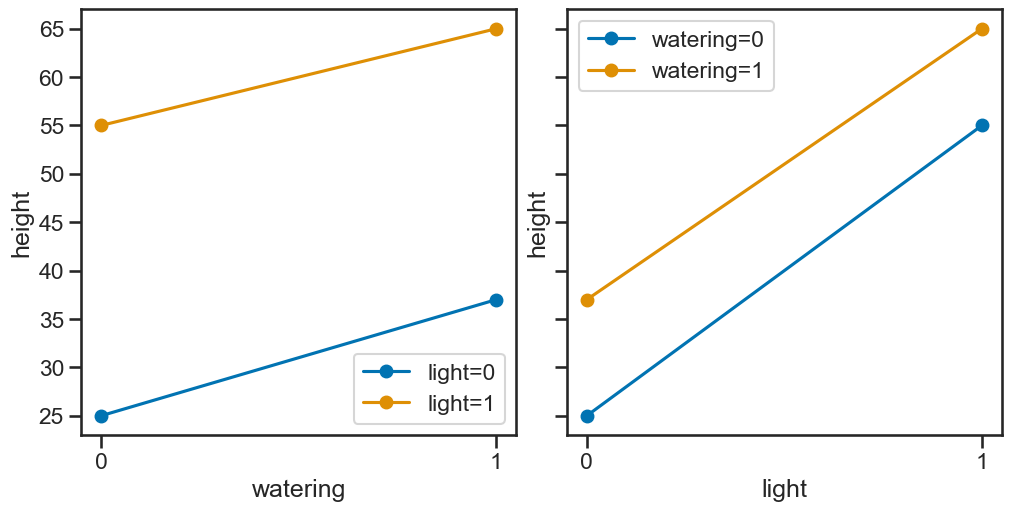

In [35]:
# baseline
baseline = df_enc["height"].mean()
print(f"# baseline = {baseline}")

# find impacts of A by fix B, of B by fix B
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True, sharey=True)
for light_ in [0, 1]:
    df = df_enc.query(f"light == {light_}")
    axs[0].plot(df["watering"], df["height"], "o-", label=f"light={light_}")
    axs[0].set(xticks=[0, 1], xlabel="watering", ylabel="height")
axs[0].legend()

for watering_ in [0, 1]:
    df = df_enc.query(f"watering == {watering_}")
    axs[1].plot(df["light"], df["height"], "o-", label=f"watering={watering_}")
    axs[1].set(xticks=[0, 1], xlabel="light", ylabel="height")
axs[1].legend()

In [38]:
df_enc[df_enc["light"] == df_enc["light"].min()]

,light,watering,exp_order,height
2,0.0,0.0,3,25
3,0.0,1.0,0,37


In [40]:
# parameter effect

def pars_effect(df=df_enc, par="light", effect="height"):
    df_parmin = df[df[par]==df[par].min()]
    df_parmax = df[df[par]==df[par].max()]

    eff_min = df_parmin[df_parmin[effect]==df_parmin[effect].max()][effect].max() - df_parmin[df_parmin[effect]==df_parmin[effect].min()][effect].max()
    eff_max = df_parmax[df_parmax[effect]==df_parmax[effect].max()][effect].max() - df_parmax[df_parmax[effect]==df_parmax[effect].min()][effect].max()

    return (eff_min + eff_max)/2

In [42]:
coeff_light = pars_effect()
coeff_watering = pars_effect(par="watering")
print(f"# effect of 'light' on 'height' = {coeff_light}")
print(f"# effect of 'watering' on 'height' = {coeff_watering}\n")
print(f"# height = {baseline} + {coeff_light/2} x 'light' + {coeff_watering/2} x 'watering'")

# effect of 'light' on 'height' = 11.0
# effect of 'watering' on 'height' = 29.0

# height = 45.5 + 5.5 x 'light' + 14.5 x 'watering'


In [44]:
# linear regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([("polynomial", PolynomialFeatures(degree=1)),
                  ("linear", LinearRegression())])
X = df_enc[["light", "watering"]]
y = df_enc["height"]

model.fit(X, y)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])

In [45]:
print(f"coefficients = {model['linear'].coef_}")
print(f"intercept = {model['linear'].intercept_}")

coefficients = [ 0. 29. 11.]
intercept = 25.499999999999996


In [46]:
y_pred = model.predict(X)

pd.DataFrame({"true":y, "predict":y_pred})

,true,predict
0,55,54.5
1,65,65.5
2,25,25.5
3,37,36.5


### 1.2. Interaction

In [51]:
df_enc["height"] = [25, 44, 21, 23]
df_enc

,light,watering,exp_order,height
0,1.0,0.0,1,25
1,1.0,1.0,2,44
2,0.0,0.0,3,21
3,0.0,1.0,0,23


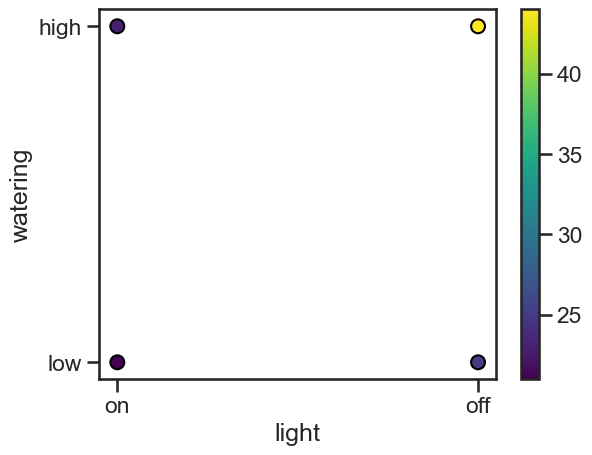

In [53]:
fig, ax = plt.subplots()
im = ax.scatter(df_enc["light"], df_enc["watering"], c=df_enc["height"], cmap="viridis", ec="k", s=100)
ax.set(xticks=[0, 1], xticklabels=light, xlabel="light")
ax.set(yticks=[0, 1], yticklabels=watering, ylabel="watering")
plt.colorbar(im)

# baseline = 28.25


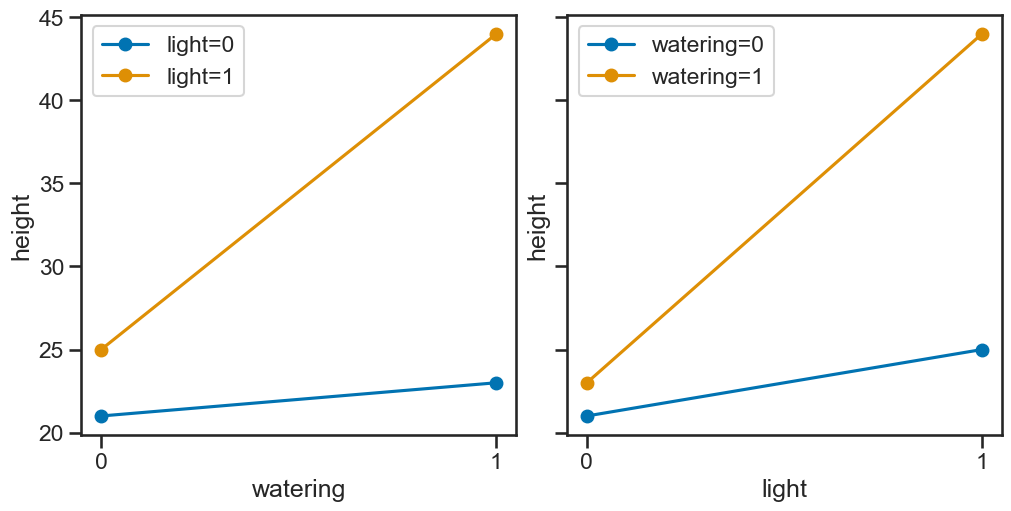

In [55]:
# baseline
baseline = df_enc["height"].mean()
print(f"# baseline = {baseline}")

# find impacts of A by fix B, of B by fix B
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True, sharey=True)
for light_ in [0, 1]:
    df = df_enc.query(f"light == {light_}")
    axs[0].plot(df["watering"], df["height"], "o-", label=f"light={light_}")
    axs[0].set(xticks=[0, 1], xlabel="watering", ylabel="height")
axs[0].legend()

for watering_ in [0, 1]:
    df = df_enc.query(f"watering == {watering_}")
    axs[1].plot(df["light"], df["height"], "o-", label=f"watering={watering_}")
    axs[1].set(xticks=[0, 1], xlabel="light", ylabel="height")
axs[1].legend()

In [57]:
model = Pipeline([("polynomial", PolynomialFeatures(degree=1)),
                  ("linear", LinearRegression())])
X = df_enc[["light", "watering"]]
y = df_enc["height"]

model.fit(X, y)
y_pred = model.predict(X)

pd.DataFrame({"true":y, "predict":y_pred})
model["linear"].coef_

array([ 0. , 12.5, 10.5])

In [59]:
# add interaction term

df_enc["interaction"] = df_enc["light"] * df_enc["watering"]

X = df_enc[["light", "watering", "interaction"]]
y = df_enc["height"]

model.fit(X, y)
y_pred = model.predict(X)

pd.DataFrame({"true":y, "predict":y_pred})

,true,predict
0,25,25.0
1,44,44.0
2,21,21.0
3,23,23.0


In [61]:
model["linear"].coef_

array([ 0.,  4.,  2., 17.])

## 2. Response Optimization with DOE
> [Response Optimization with Design of Experiments with python](https://towardsdatascience.com/response-optimization-with-design-of-experiments-and-python-63f9afb3f26f)

### 2.1. Problem Definition

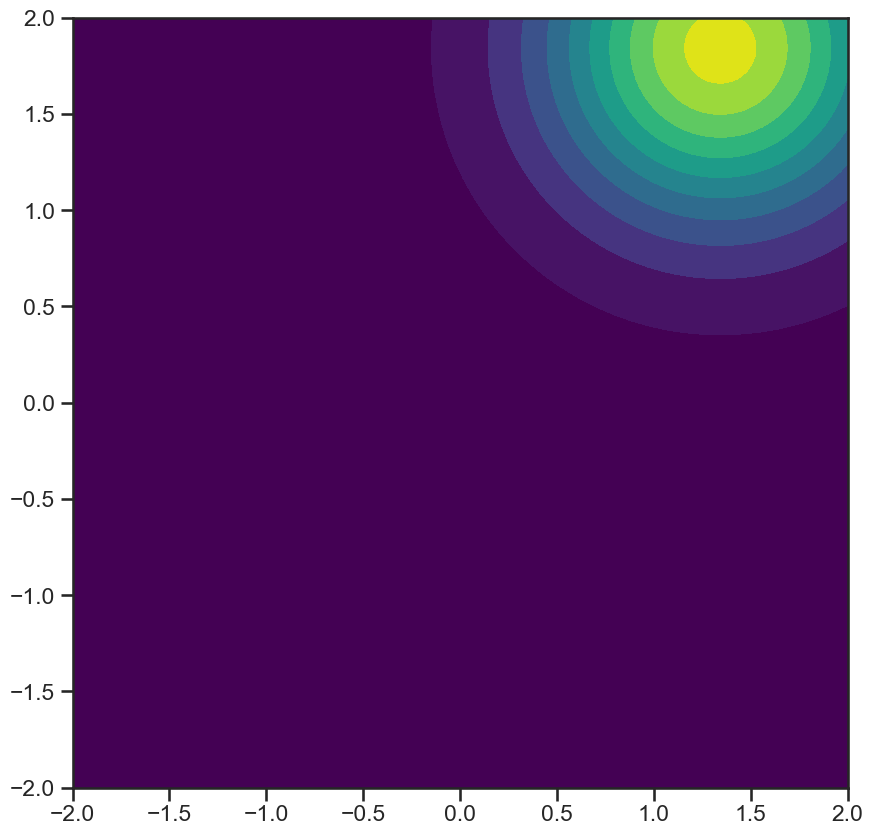

In [65]:
# true values

def gaussian_function(x, y, pars=None, add_noise=False):
    if not pars:
        x0 = np.random.randn(1)[0] + 0.5
        y0 = x0 + 0.5
        fwhm = np.random.normal(loc=1.5, scale=3, size=100).mean()
    else:
        x0, y0, fwhm = pars

    func = 10*np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2)/fwhm**2)

    if add_noise:
        func = add_noise_func(func)

    return func, x0, y0, fwhm

def add_noise_func(input_data, mean_noise=0):
    avg_data = np.mean(input_data)
    noise_ = np.random.normal(mean_noise, np.sqrt(avg_data), 1)[0]
    output_data = input_data + noise_

    return output_data

x = np.round(np.linspace(-2, 2, 101), 2)
y = np.round(np.linspace(-2, 2, 101), 2)
xx, yy = np.meshgrid(x, y)
zz, x0, y0, fwhm = gaussian_function(xx, yy, add_noise=True)

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.contourf(xx, yy, zz, levels=10, vmin=0, cmap="viridis")

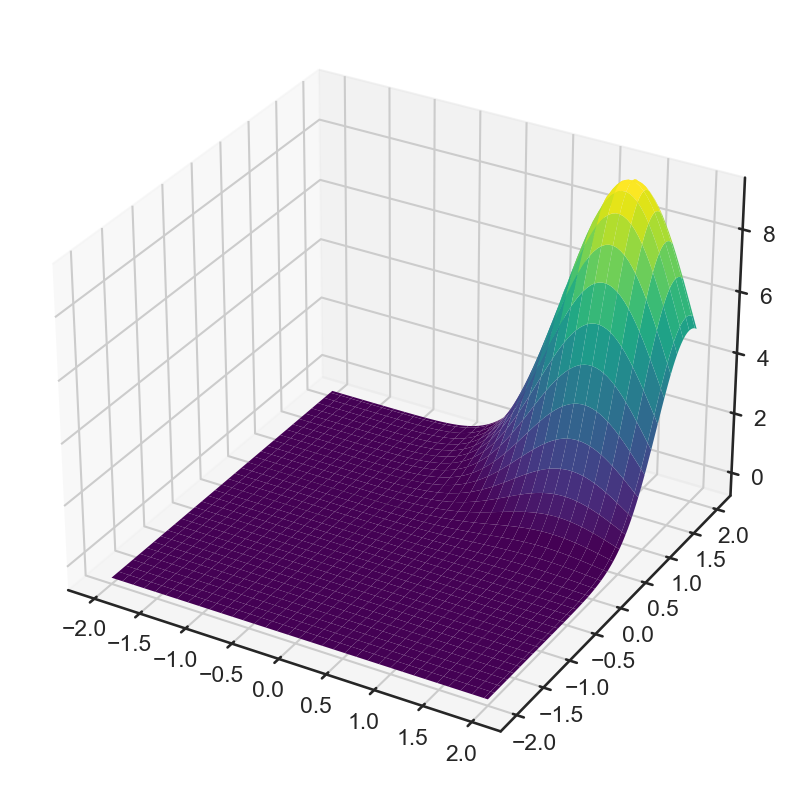

In [66]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, zz, cmap="viridis", lw=0, vmin=0)

In [67]:
xs, ys = [0.5, 1], [0.5, 1]
xy = [(x, y) for x in xs for y in ys]
df = pd.DataFrame(data=xy, columns=["x", "y"])
df

,x,y
0,0.5,0.5
1,0.5,1.0
2,1.0,0.5
3,1.0,1.0


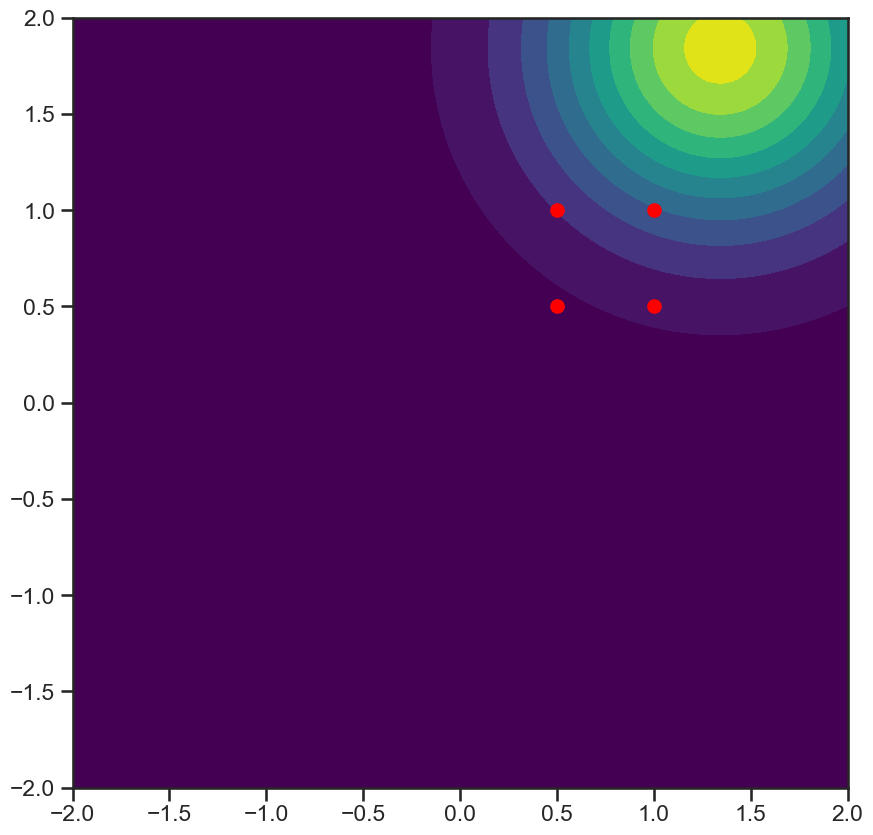

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, zz, levels=10, vmin=0, cmap="viridis")
ax.scatter(df["x"], df["y"], c="r")

### 2.2. From Scratch

In [74]:
# get results on each point

df["result"] = df.apply(lambda r: gaussian_function(r["x"], r["y"], pars=(x0, y0, fwhm))[0], axis=1)
df

,x,y,result
0,0.5,0.5,0.389986
1,0.5,1.0,1.598347
2,1.0,0.5,0.838217
3,1.0,1.0,3.435407


In [76]:
# normalization

x_mean = df["x"].mean()
y_mean = df["y"].mean()
x_range = df["x"].max() - df["x"].min()
y_range = df["y"].max() - df["y"].min()

df["xc"] = (df["x"]-x_mean)/(x_range/2)
df["yc"] = (df["y"]-y_mean)/(y_range/2)
df

,x,y,result,xc,yc
0,0.5,0.5,0.389986,-1.0,-1.0
1,0.5,1.0,1.598347,-1.0,1.0
2,1.0,0.5,0.838217,1.0,-1.0
3,1.0,1.0,3.435407,1.0,1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


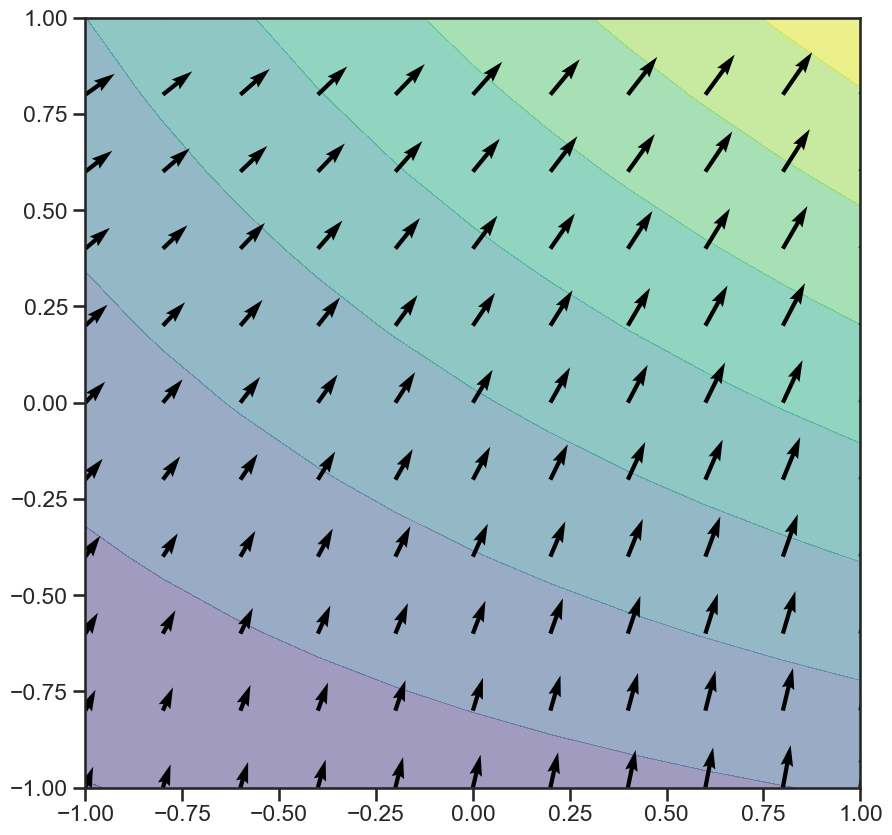

In [78]:
# find direction: 2nd degree polynomial fitting

model = Pipeline([("polynomial", PolynomialFeatures(degree=2,
                                                    interaction_only=True,
                                                    include_bias=False)),
                  ("linear", LinearRegression())])
model.fit(df[["xc", "yc"]], df["result"])

x_pred = np.linspace(df["xc"].min(), df["xc"].max(), 11)
y_pred = np.linspace(df["yc"].min(), df["yc"].max(), 11)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
zz_pred = model.predict(np.c_[xx_pred.ravel(), yy_pred.ravel()]).reshape(len(x_pred), len(y_pred))

v_pred, u_pred = np.gradient(zz_pred, 0.1, 0.1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx_pred, yy_pred, zz_pred, alpha=0.5, cmap="viridis")
ax.quiver(xx_pred, yy_pred, u_pred, v_pred)

In [80]:
# slope

print(f"# coefficients of linear model = {model['linear'].coef_}")
x_coef = model["linear"].coef_[0]
y_coef = model["linear"].coef_[1]
slope = np.sign(x_coef)*y_coef/x_coef
print(f"x_coef = {x_coef}, y_coef = {y_coef}")
print(f"slope = {slope}")

# coefficients of linear model = [0.57132265 0.95138763 0.34720731]
x_coef = 0.5713226455142417, y_coef = 0.951387628783767
slope = 1.6652370359439064


In [82]:
# increment

print(f"# mean: ({x_mean}, {y_mean})")

stepsize = 2
x_increment = x_coef * stepsize
y_increment = y_coef * stepsize
print(f"# increment: ({x_increment}, {y_increment})")

x_mean_new = x_increment * (x_range/2) + x_mean
y_mean_new = y_increment * (y_range/2) + y_mean
print(f"# mean (new): ({x_mean_new}, {y_mean_new})")

x_next = np.array([x_mean_new - x_range/4, x_mean_new + x_range/4])
y_next = np.array([y_mean_new - y_range/4, y_mean_new + y_range/4])
df_next = pd.DataFrame([(i, j) for i in x_next for j in y_next], columns=["x", "y"])
df_next.loc[4] = df_next.mean(axis=0)
print("# df_next")
display(df_next)

# mean: (0.75, 0.75)
# increment: (1.1426452910284834, 1.902775257567534)
# mean (new): (1.0356613227571208, 1.2256938143918834)
# df_next


,x,y
0,0.910661,1.100694
1,0.910661,1.350694
2,1.160661,1.100694
3,1.160661,1.350694
4,1.035661,1.225694


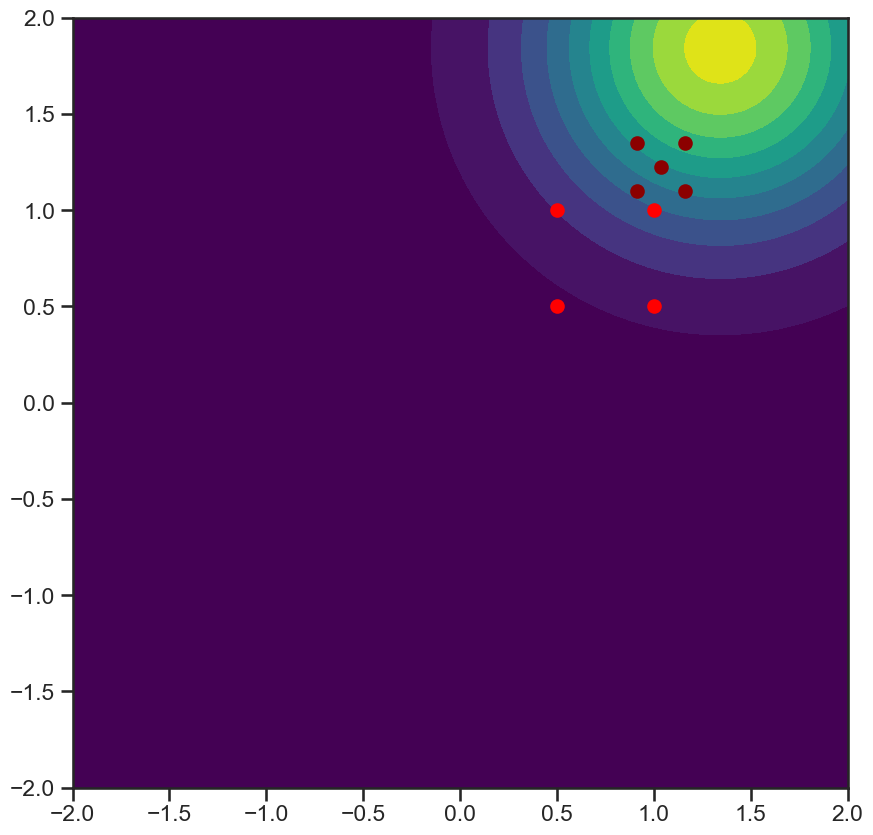

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, zz, levels=10, vmin=0, cmap="viridis")
ax.scatter(df["x"], df["y"], c="r")
ax.scatter(df_next["x"], df_next["y"], c="darkred")

### 2.3. Functionalize

In [87]:
def add_final_points(temp_df):
        mean_x, mean_y, range_x, range_y = normal_to_coded_var(temp_df, output_pars = True)

        temp_df.loc[len(temp_df)] = [mean_x+range_x,mean_y]
        temp_df.loc[len(temp_df)] = [mean_x-range_x,mean_y]
        temp_df.loc[len(temp_df)] = [mean_x,mean_y+range_y]
        temp_df.loc[len(temp_df)] = [mean_x,mean_y-range_y]

        return temp_df

def output_model(x_d1, y_d1, model=None, pars=None, cnt_point=True, final_stage=False) -> pd.DataFrame:
    # inputs 2 arrays of coordinates, outputs a full factorial
    temp_df = pd.DataFrame([(i,j) for i in x_d1 for j in y_d1], columns=['x','y'])

    if cnt_point:
        temp_df.loc[len(temp_df)] = [temp_df['x'].mean(),temp_df['y'].mean()]

    if final_stage:
        temp_df = add_final_points(temp_df)

    temp_df = normal_to_coded_var(temp_df)
    temp_df['outcome'] = temp_df.apply(lambda x: gaussian_function(x['x'], x['y'], pars)[0], axis=1)

    if model:
        temp_df['predict'] = model.predict(temp_df[['x','y']])
        temp_df['mape'] = 100*(temp_df['outcome'] - temp_df['predict'])/temp_df['outcome']

    return temp_df

def normal_to_coded_var(input_df, output_pars = False):
    # mapping between original and coded variables
    temp_df = input_df.copy()
    mean_x = temp_df['x'].mean()
    mean_y = temp_df['y'].mean()
    range_x = temp_df['x'].max()-temp_df['x'].min()
    range_y = temp_df['y'].max()-temp_df['y'].min()

    temp_df['cX'] = (temp_df['x']-mean_x)/(range_x/2)
    temp_df['cY'] = (temp_df['y']-mean_y)/(range_y/2)

    if output_pars:
        return mean_x, mean_y, range_x, range_y

    return temp_df

def coded_to_normal(pars, x_coded, y_coded):
    # mapping between coded and normal variables
    mean_x, mean_y, range_x, range_y = pars

    real_x = x_coded*(range_x/2) + mean_x
    real_y = y_coded*(range_y/2) + mean_y

    return real_x, real_y

def plot_contour_fromdf(test_df, fill_value=0, model=None, levels=10, plot_normal_vars=True):
    # surface plots
    # if there's no model try to plot a contour plot given the dataframe
    # otherwise use the model to predict values from min to max value of each dimension
    x, y = 'cX','cY'

    if not model:
        hdf = test_df.groupby(input_vars).mean()
        hdfreset = hdf.reset_index()
        hdfreset.columns = [x, y, 'outcome']
        hdfpivot= hdfreset.pivot(x, y).fillna(0)

        X=hdfpivot.columns.levels[1].values
        Y=hdfpivot.index.values
        Xi,Yi = np.meshgrid(X, Y)
        Z=hdfpivot.values
    else:
        X = np.linspace(test_df[x].min(),test_df[x].max(),levels)
        Y = np.linspace(test_df[y].min(),test_df[y].max(),levels)
        Xi,Yi = np.meshgrid(X, Y)
        Z = model.predict(np.c_[Xi.ravel(),Yi.ravel()]).reshape(len(X),len(Y))

    if plot_normal_vars:
        temp_df = pd.DataFrame()
        temp_df[x] = Xi.ravel()
        temp_df[y] = Yi.ravel()
        Z = model.predict(temp_df).reshape(len(X),len(Y))
        mean_x, mean_y, range_x, range_y = normal_to_coded_var(test_df, output_pars = True)
        temp_df['x'] = temp_df[x]*(range_x/2) + mean_x
        temp_df['y'] = temp_df[y]*(range_y/2) + mean_y
        X = np.linspace(test_df['x'].min(),test_df['x'].max(),levels)
        Y = np.linspace(test_df['y'].min(),test_df['y'].max(),levels)

        Xi,Yi = np.meshgrid(X, Y)
    else:
        mean_x, mean_y = 0, 0

    # gradients given Z to plot quiverplot
    v, u = np.gradient(Z, 0.1, 0.1)
    fig, ax = plt.subplots(figsize=(10, 9))
    im = ax.contourf(Xi, Yi, Z, alpha=0.7, cmap="viridis", vmin=zz.min(), vmax=zz.max())
    ax.quiver(Xi,Yi,u,v)
    plt.colorbar(im);

def linear_pipe_fit(degree=2, interaction=True, dataframe=pd.DataFrame(), input_vars=['cX','cY']):

    lr = LinearRegression()
    pol = PolynomialFeatures(degree=degree, interaction_only=interaction, include_bias=False)
    pipe = Pipeline([('pol',pol), ('lr', lr)])
    pipe.fit(dataframe[input_vars].values, dataframe['outcome'])
    coefs = pipe['lr'].coef_
    intercept = pipe['lr'].intercept_

    return pipe

def next_step(model=None, increment_y = 1, step_x = 0.125, step_y = 0.125, dataframe=pd.DataFrame()):

    mean_x, mean_y, range_x, range_y = normal_to_coded_var(dataframe, output_pars = True)
    coef_x = model['lr'].coef_[0]
    coef_y = model['lr'].coef_[1]
    ratio = coef_x/coef_y

    print(f'coef x {coef_x:.2f} and coef y {coef_y:.2f}')

    increment_x = np.abs(ratio)*increment_y*np.sign(coef_x)
    increment_y = increment_y*np.sign(coef_y)

    print(f'increment x {increment_x:.2f} and increment y {increment_y:.2f} with ratio {ratio:.2f}')

    base_x = increment_x*(range_x/2)+mean_x
    base_y = increment_y*(range_y/2)+mean_y

    print(f'new x {base_x:.2f} and new y {base_y:.2f}')

    next_x = np.round(np.array([base_x-step_x, base_x+step_x]),2)
    next_y = np.round(np.array([base_y-step_y, base_y+step_y]),2)

    return next_x, next_y

def final_step(model=None, pars=None, dataframe=pd.DataFrame(), final_stage=True):
    # do the last step with an increased precision
    next_x, next_y = next_step(model=model, dataframe=dataframe)
    test_df = output_model(next_x, next_y, pars=pars, cnt_point=True, final_stage=final_stage)
    return test_df

#### iteration 1

In [90]:
x_d1 = np.array([0.5,1])
y_d1 = np.array([-0.5,-1])
doe = output_model(x_d1, y_d1, pars=(x0, y0, fwhm), cnt_point=False)
doe

,x,y,cX,cY,outcome
0,0.5,-0.5,-1.0,1.0,0.003349
1,0.5,-1.0,-1.0,-1.0,0.000118
2,1.0,-0.5,1.0,1.0,0.007197
3,1.0,-1.0,1.0,-1.0,0.000253


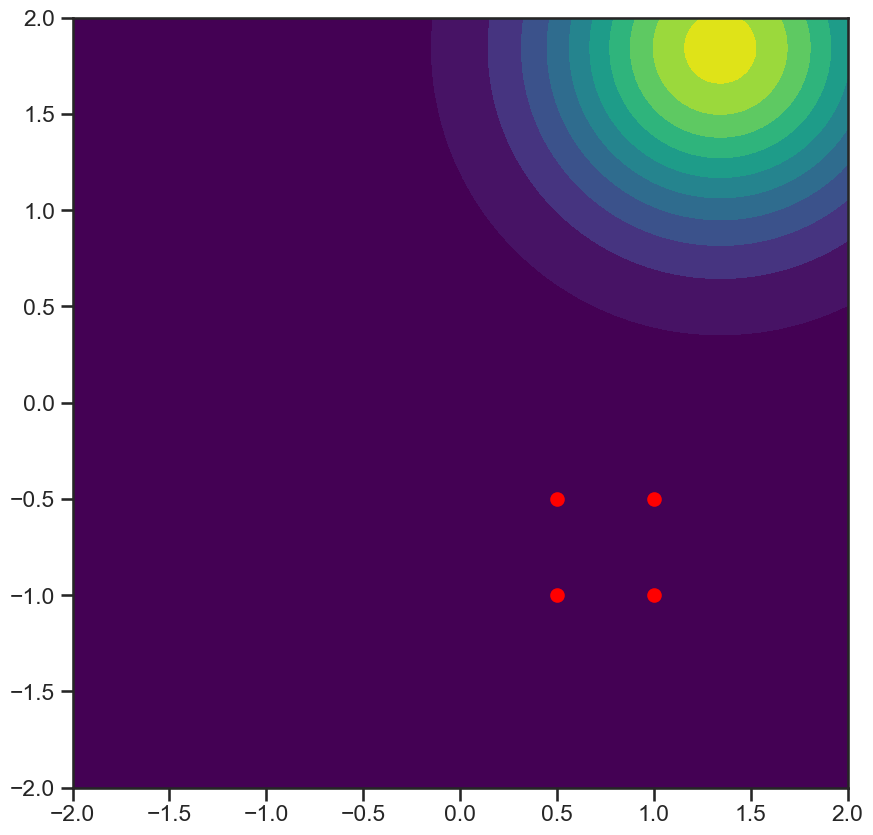

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, zz, levels=10, vmin=0, cmap="viridis")
ax.scatter(doe["x"], doe["y"], c="r")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


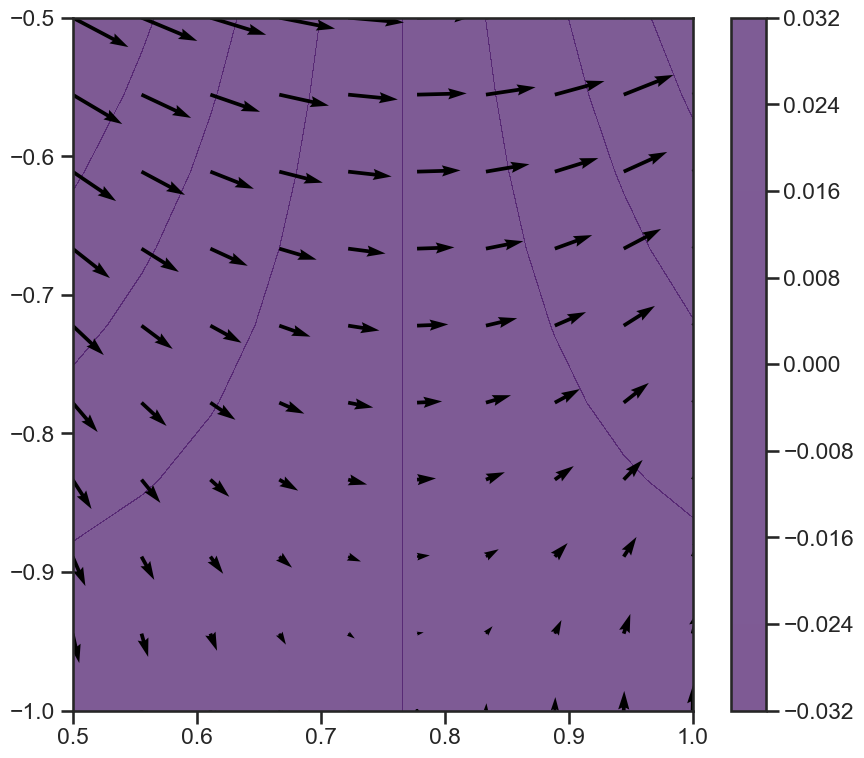

In [94]:
pipe1 = linear_pipe_fit(degree=2, interaction=True, dataframe=doe, input_vars=['x','y'])
plot_contour_fromdf(doe, fill_value=0, model = pipe1, plot_normal_vars=True)

#### iteration 2

In [97]:
x_d2, y_d2 = next_step(model=pipe1, increment_y = 2, dataframe=doe)
print(x_d2, y_d2)

coef x 0.02 and coef y -0.00
increment x 31.34 and increment y -2.00 with ratio -15.67
new x 8.59 and new y -1.25
[8.46 8.71] [-1.38 -1.12]


coef x -0.00 and coef y 0.00
increment x -2.63 and increment y 2.00 with ratio -1.31
new x 8.26 and new y -0.99
[8.13 8.38] [-1.12 -0.87]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


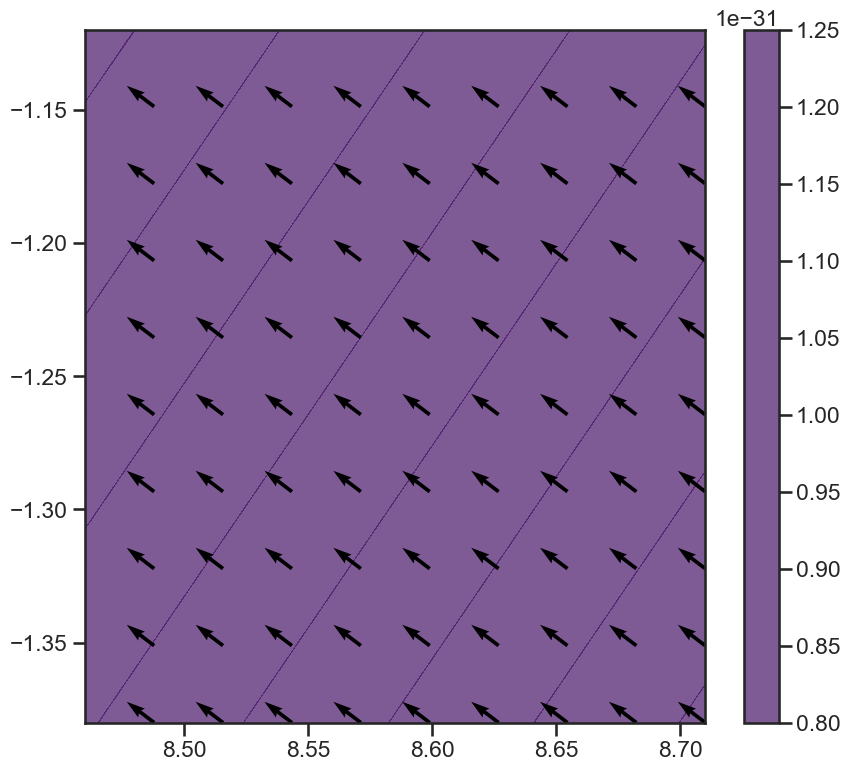

In [99]:
test_df2 = output_model(x_d2, y_d2, model = pipe1, pars=(x0, y0, fwhm), cnt_point=True)
pipe2 = linear_pipe_fit(degree=1, interaction=True, dataframe=test_df2, input_vars=['x','y'])
plot_contour_fromdf(test_df2, fill_value=0, model = pipe2)
x_d3, y_d3 = next_step(model=pipe2, increment_y = 2, dataframe=test_df2)
print(x_d3, y_d3)

In [101]:
test_df2

,x,y,cX,cY,outcome,predict,mape
0,8.460,-1.38,-1.0,-1.0,6.003159e-34,-0.045109,7.514176e+33
1,8.460,-1.12,-1.0,1.0,4.786274e-33,-0.012689,2.651113e+32
2,8.710,-1.38,1.0,-1.0,5.601036e-36,-0.046452,8.293487e+35
3,8.710,-1.12,1.0,1.0,4.465664e-35,-0.013067,2.926065e+34
4,8.585,-1.25,0.0,0.0,1.707526e-34,-0.029329,1.717641e+34


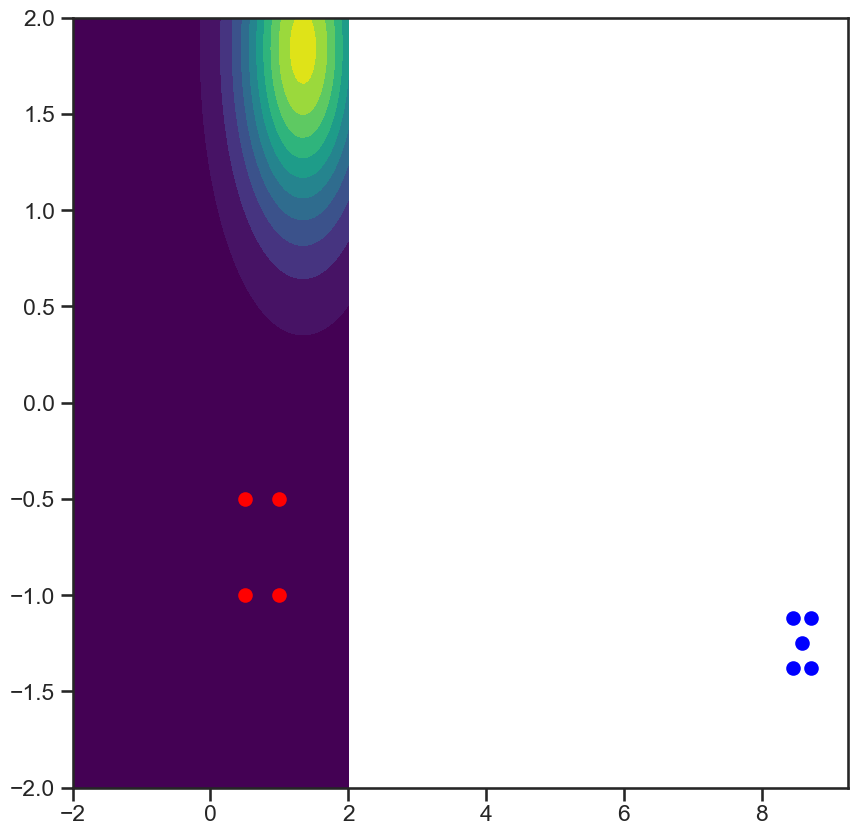

In [103]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, zz, levels=10, vmin=0, cmap="viridis")
ax.scatter(doe["x"], doe["y"], c="r")
ax.scatter(test_df2.x,test_df2.y, c='b')

#### iteration 3

coef x -0.00 and coef y 0.00
increment x -2.70 and increment y 2.00 with ratio -1.35
new x 7.92 and new y -0.74
[7.79 8.04] [-0.87 -0.62]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


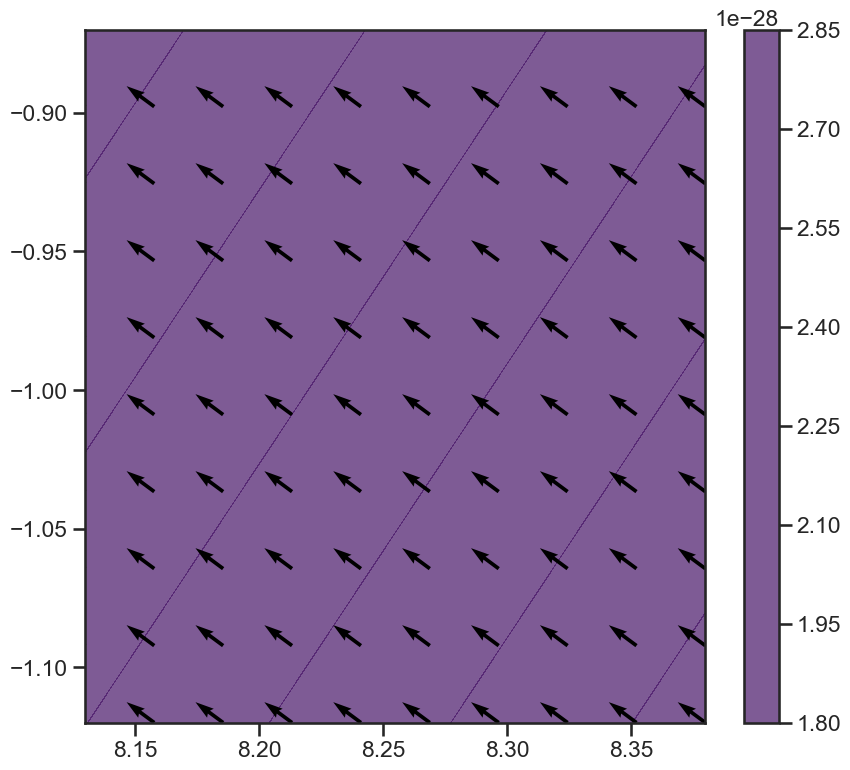

In [106]:
test_df3 = output_model(x_d3, y_d3, pipe2, pars=(x0, y0, fwhm), cnt_point=False)
pipe3 = linear_pipe_fit(degree=1, interaction=True, dataframe=test_df3, input_vars=['x','y'])
plot_contour_fromdf(test_df3, fill_value=0, model = pipe3)
x_d4, y_d4 = next_step(model=pipe3, increment_y = 2, dataframe=test_df3)
print(x_d4, y_d4)

In [108]:
test_df3


,x,y,cX,cY,outcome,predict,mape
0,8.13,-1.12,-1.0,-1.0,1.788300e-30,7.033836e-33,99.606675
1,8.13,-0.87,-1.0,1.0,1.116607e-29,9.065093e-33,99.918816
2,8.38,-1.12,1.0,-1.0,2.064584e-32,4.365670e-33,78.854486
3,8.38,-0.87,1.0,1.0,1.289118e-31,6.396927e-33,95.037748


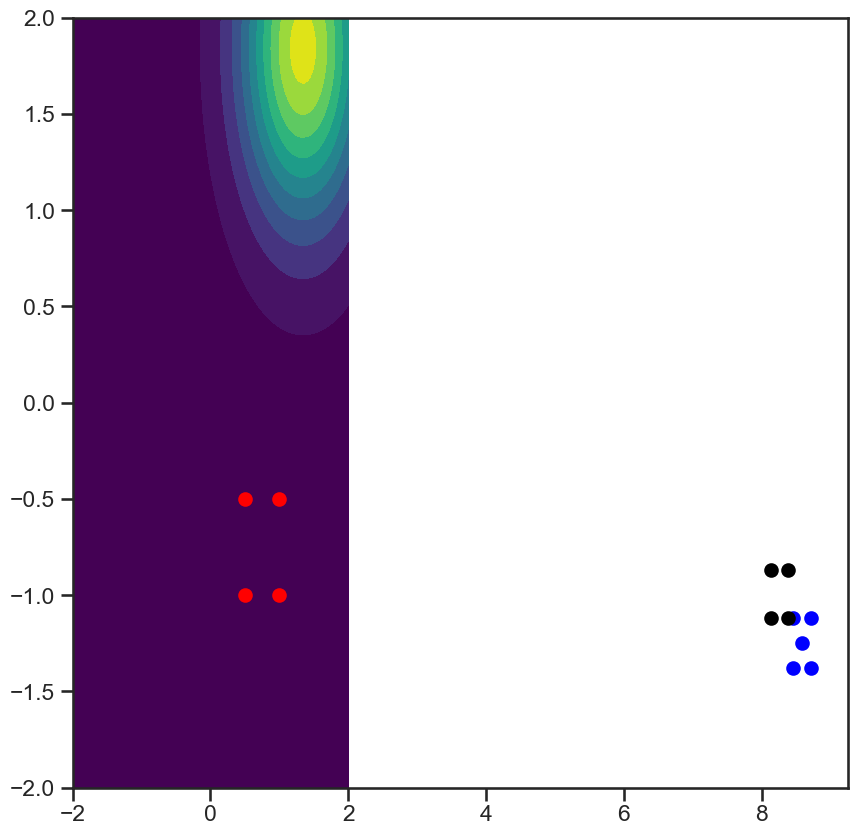

In [110]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, zz, levels=10, vmin=0, cmap="viridis")
ax.scatter(doe["x"], doe["y"], c="r")
ax.scatter(test_df2.x,test_df2.y, c='b')
ax.scatter(test_df3.x,test_df3.y, c='k')

#### iterations

In [113]:
steps_df = pd.DataFrame()
x_t = np.array([0.5,1])
y_t = np.array([-0.5,-1])

for i in range(10):
    test_df = output_model(x_t, y_t, pars=(x0, y0, fwhm), cnt_point=False)
    test_df['iteration'] = i
    pipe1 = linear_pipe_fit(degree=1, interaction=True, dataframe=test_df, input_vars=['x','y'])
    x_t, y_t = next_step(pipe1, increment_y = 2, dataframe=test_df)
    #plot_contour_fromdf(test_df, fill_value=0, model = pipe1, plot_normal_vars=True)
    steps_df = steps_df.append(test_df)
    max_outcome = test_df['outcome'].max()

    if max_outcome < steps_df['outcome'].max():
        final_ = final_step(model=pipe1, pars=(x0, y0, fwhm), dataframe=test_df)
        final_['iteration'] = i
        pipe_last = linear_pipe_fit(degree=2, interaction=True, dataframe=final_, input_vars=['x','y'])
        steps_df = steps_df.append(final_)
        print(f'maximum found at iteration {i}')
        break
    print(x_t, y_t)

coef x 0.00 and coef y 0.01
increment x 0.78 and increment y 2.00 with ratio 0.39
new x 0.95 and new y -0.25


AttributeError: 'DataFrame' object has no attribute 'append'

ValueError: Could not interpret value `x` for `x`. An entry with this name does not appear in `data`.

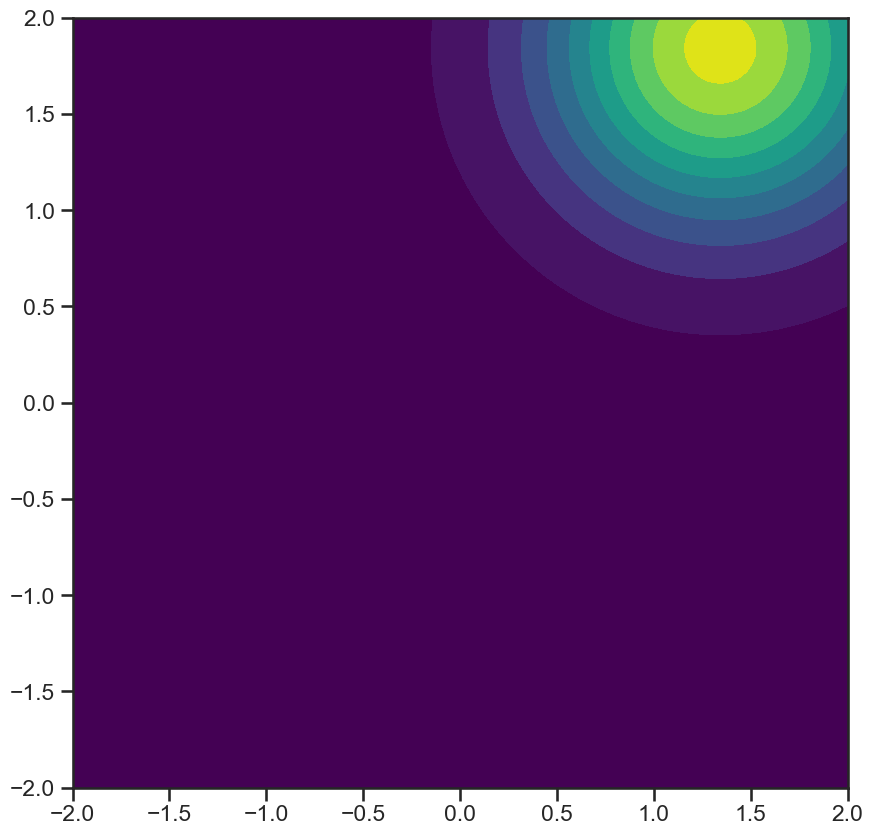

In [115]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, zz, levels=10, vmin=0, cmap="viridis")
sns.scatterplot(x='x',y='y',data=steps_df, hue='iteration', palette='coolwarm', legend='full', edgecolor='k')

In [ ]:
steps_df[steps_df.iteration==7]


,x,y,cX,cY,outcome,iteration


# Probability

## 빈도주의 주사위

In [117]:
dice60 = np.random.choice(range(1, 7), replace=True, size=60)
np.unique(dice60, return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([10,  3, 19,  8, 15,  5]))

In [119]:
np.unique(np.random.choice(range(1, 7), replace=True, size=600),
          return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([101, 101, 104,  95,  95, 104]))

In [121]:
np.unique(np.random.choice(range(1, 7), replace=True, size=6000),
          return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([1058,  993,  995,  994,  989,  971]))

In [123]:
np.unique(np.random.choice(range(1, 7), replace=True, size=60000),
          return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([ 9997,  9943, 10035,  9848, 10003, 10174]))

## 사기 동전 의심

Text(0.66, 10, 'N=1, prob$_{max}$ = ${0.66}$')

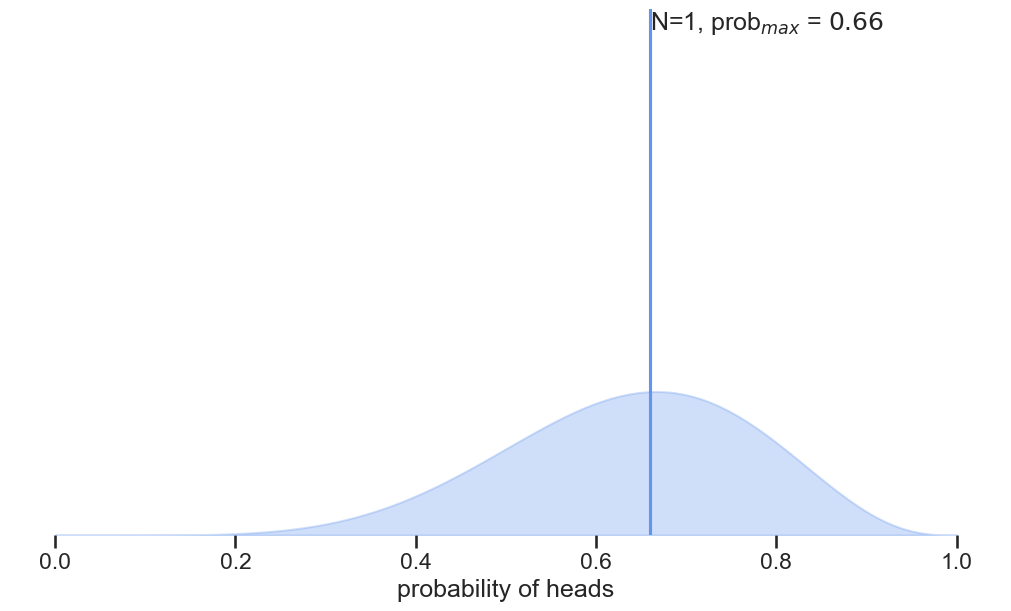

In [186]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

N = 1                                       # 동전을 던진 수
beta = stats.beta                           # 베타 분포
data = stats.bernoulli.rvs(0.5, size=N)     # 앞면=1, 뒷면=0
x = np.linspace(0, 1, 100)                  # 확률을 0~1까지 100등분

heads = data.sum()                          # 앞면이 나온 총 횟수
pdf = beta.pdf(x, 7+heads, 3+(N-heads))     # 동전을 N번 던진 후 앞면Posterior
prob_argmax = pdf.argmax()/100              # 확률이 가장 높은 지점
prob_max = pdf.max()/100                    # 가장 높은 확률

ax.fill_between(x, 0, pdf, fc="cornflowerblue", ec="cornflowerblue", alpha=0.3)
ax.set_xlabel("probability of heads")
ax.spines[:].set_visible(False)
ax.set(yticks=[], ylim=(0, 10))
ax.axvline(prob_argmax, c="cornflowerblue")
ax.text(prob_argmax, 10, f"N={N}, prob$_{{{'max'}}}$ = ${{{prob_argmax}}}$", va="top")

# Gaussian Process

## Basic Example
> [Gaussian Process regression: basic introductory example](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py)

### 3.1. without noise

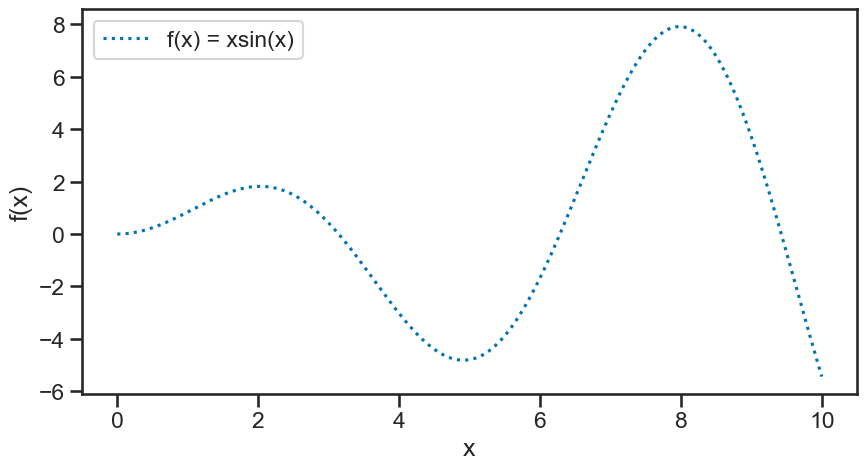

In [197]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X, y, ":", label="f(x) = xsin(x)")
ax.set(xlabel="x", ylabel="f(x)")
ax.legend()

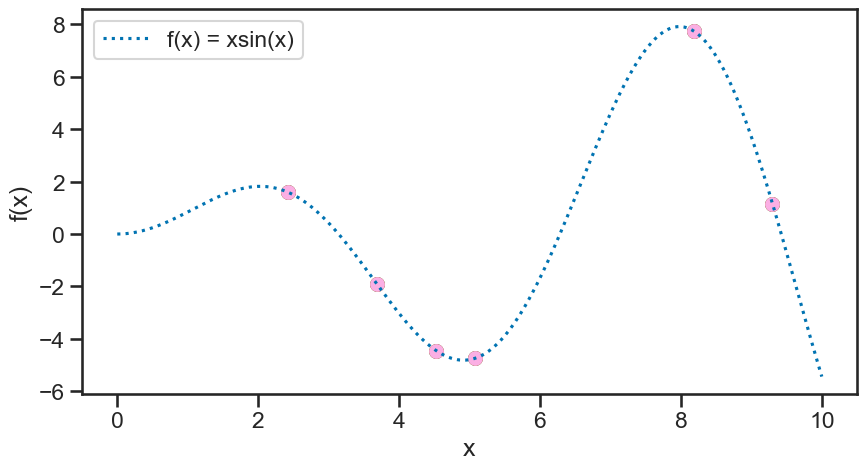

In [211]:
rng = np.random.RandomState(1)      # Random Number Generator
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

ax.scatter(X_train, y_train)
display(fig)

In [215]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 2e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

RBF(length_scale=0.687)

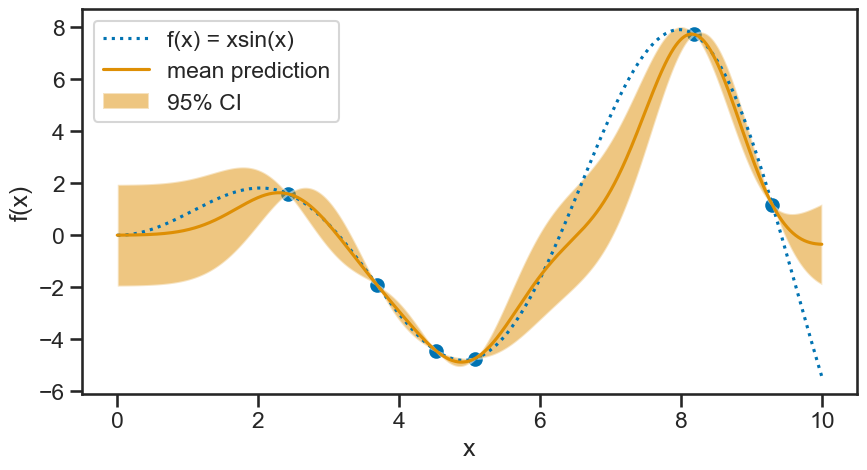

In [221]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X, y, ":", label="f(x) = xsin(x)")
ax.scatter(X_train, y_train)
ax.plot(X, mean_prediction, label="mean prediction")
ax.fill_between(X.ravel(),
                mean_prediction-1.96*std_prediction,
                mean_prediction+1.96*std_prediction,
                alpha=0.5,
                label="95% CI")
ax.set(xlabel="x", ylabel="f(x)")
ax.legend()

### 3.2. choice of next observation

* prior

In [ ]:
def plot_gpr_samples(gpr_model, ax, n_samples = 5):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    x = np.linspace(0, 10, 1000)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - 1.96*y_std,
        y_mean + 1.96*y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.set_ylim([-5, 5])
    return y_mean, y_std

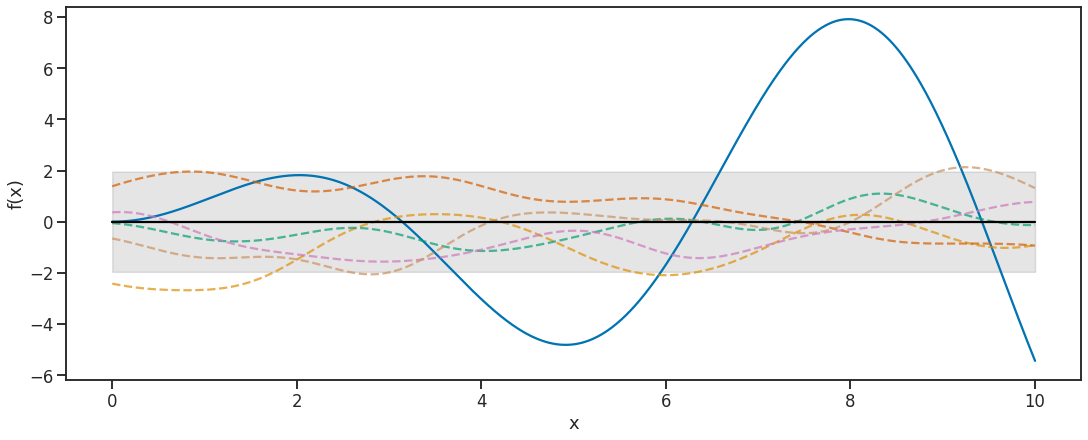

In [ ]:
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 2e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=9)

fig, ax = plt.subplots(figsize=(15, 6), constrained_layout=True)
ax.plot(X, y, label="f(x) = xsin(x)")
y_mean, y_std = plot_gpr_samples(gaussian_process, n_samples=5, ax=ax)
ax.set_ylim(-6.2, 8.4)
fig.savefig("GP_0.png")

* step 1: 3 points

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


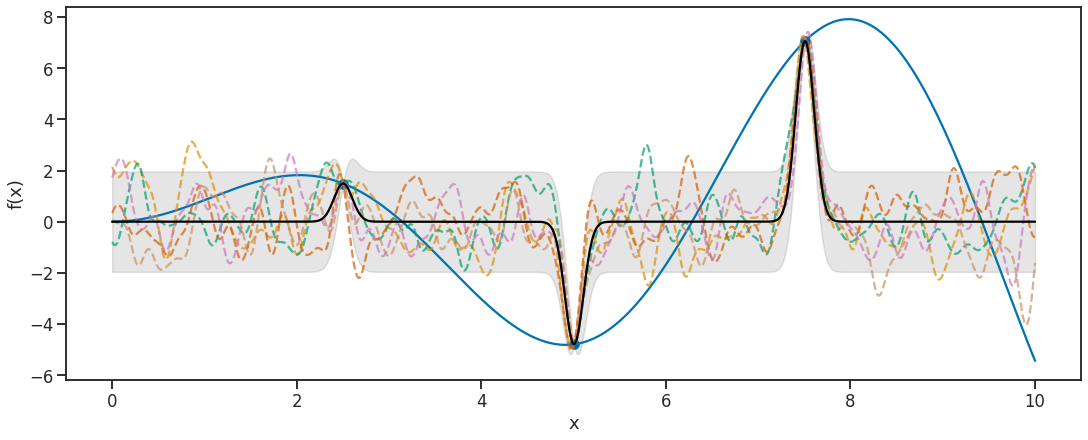

In [ ]:
training_indices = [250, 500, 750]
X_train, y_train = X[training_indices], y[training_indices]

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 2e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

fig, ax = plt.subplots(figsize=(15, 6), constrained_layout=True)
ax.plot(X, y, label="f(x) = xsin(x)")
ax.scatter(X_train, y_train)
y_mean, y_std = plot_gpr_samples(gaussian_process, n_samples=5, ax=ax)
ax.set_ylim(-6.2, 8.4)
fig.savefig("GP_1.png")

* step 2

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The

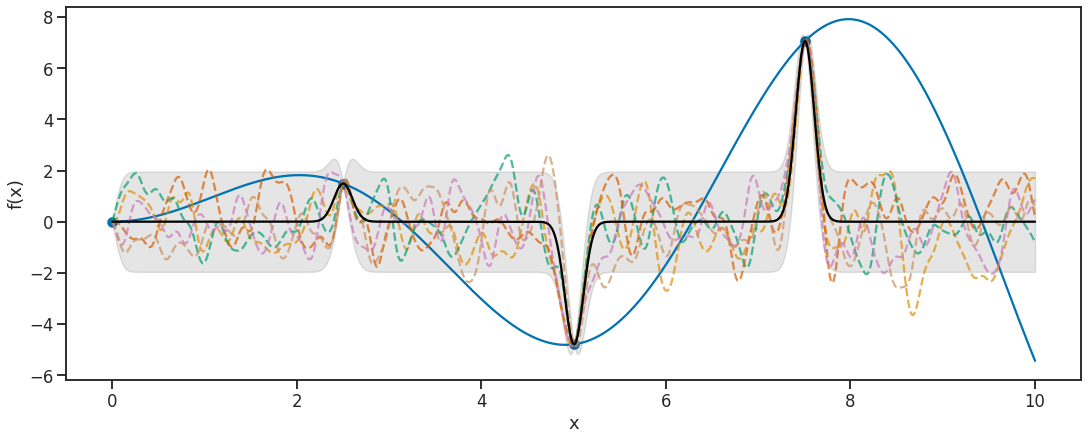

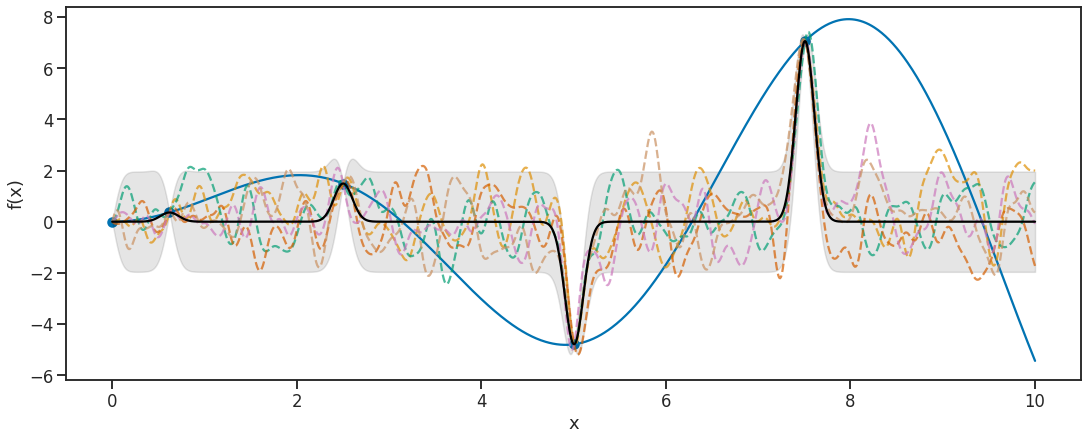

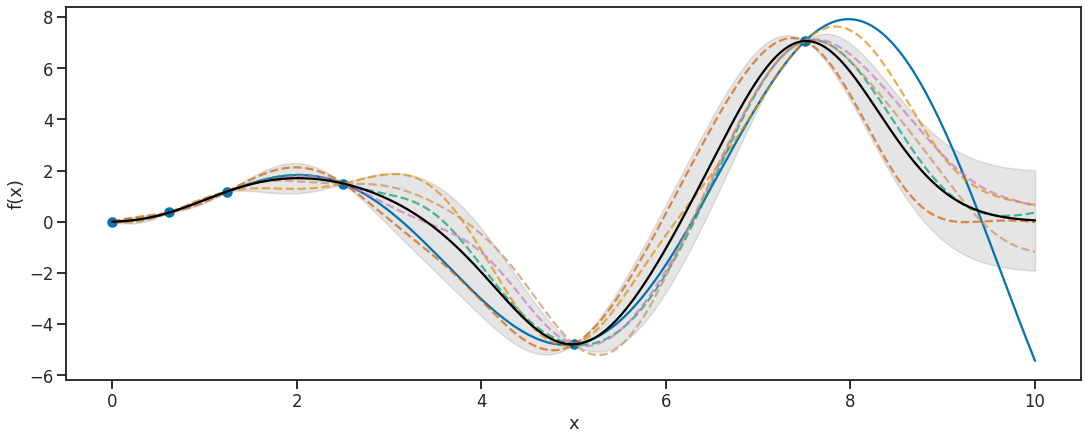

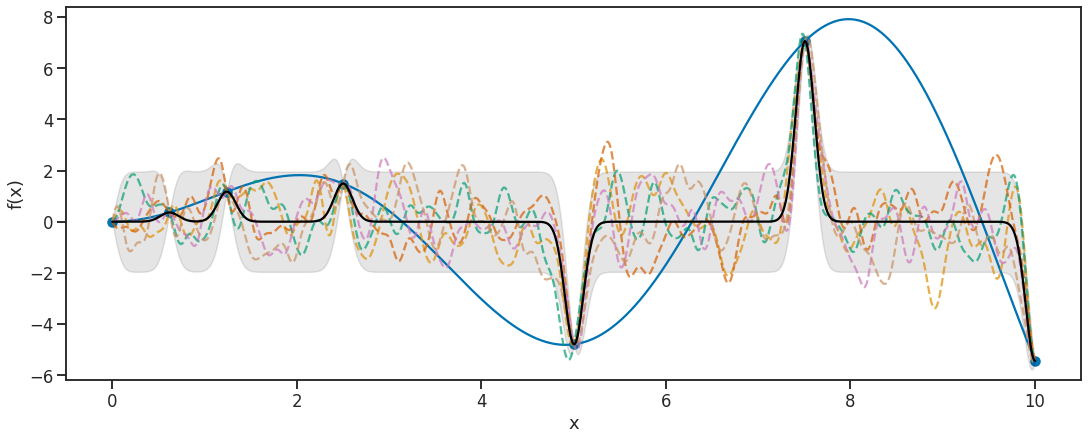

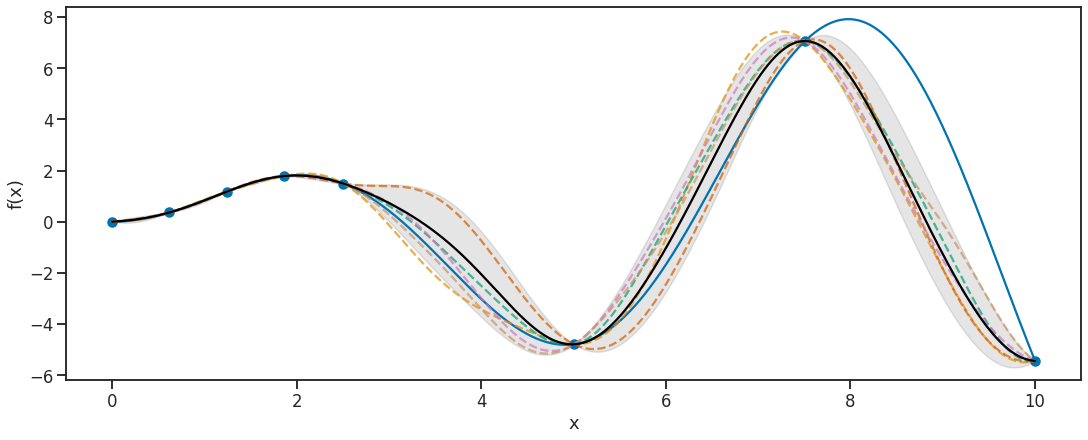

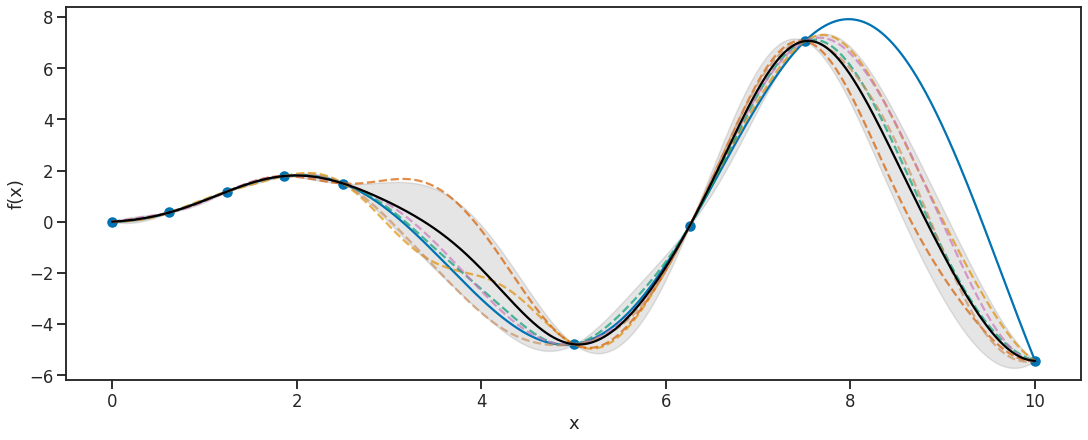

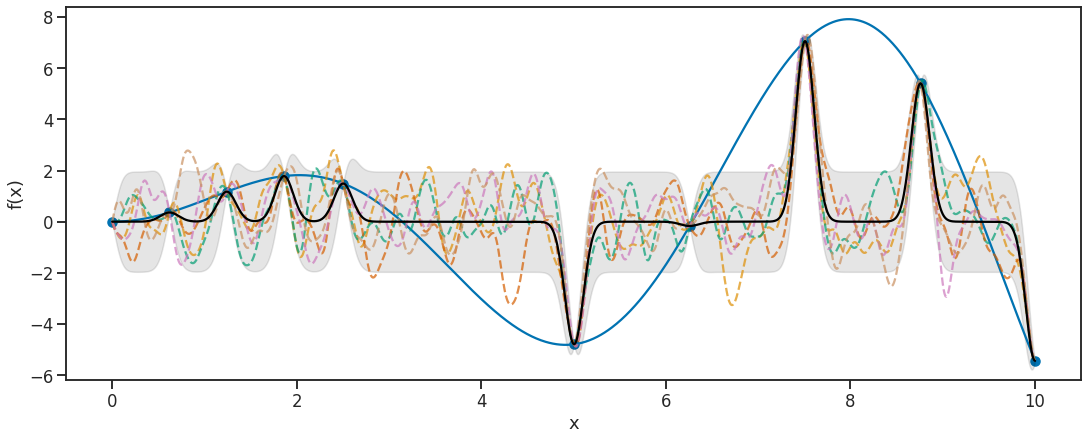

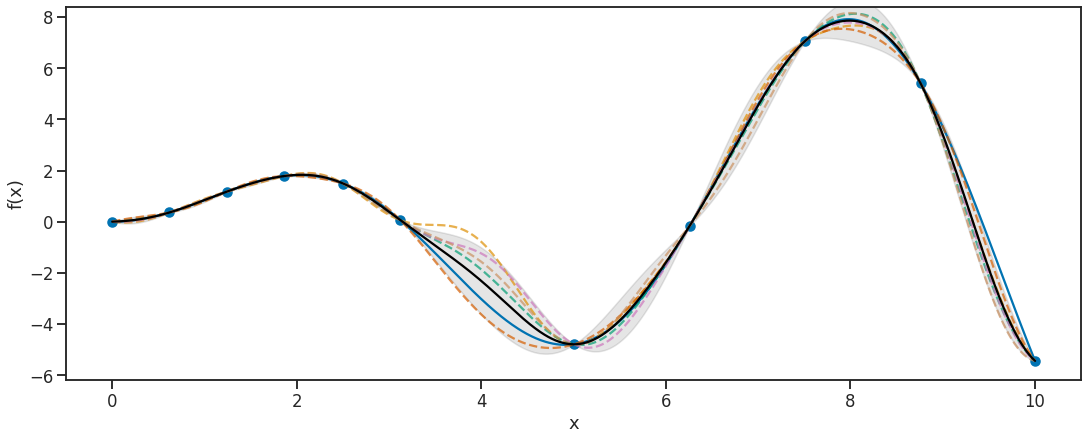

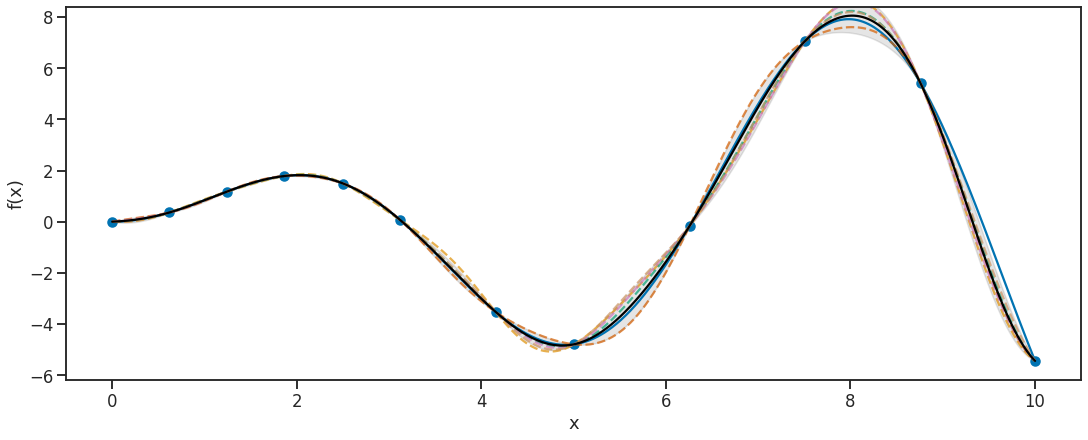

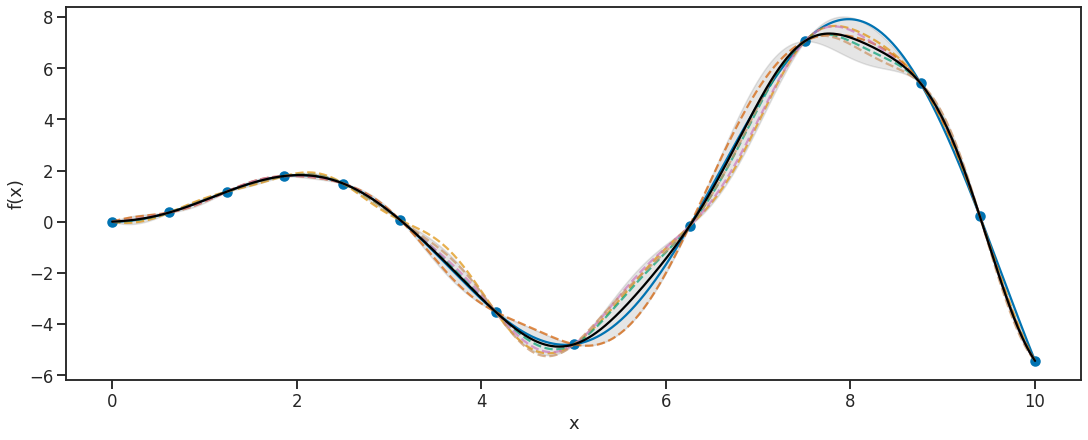

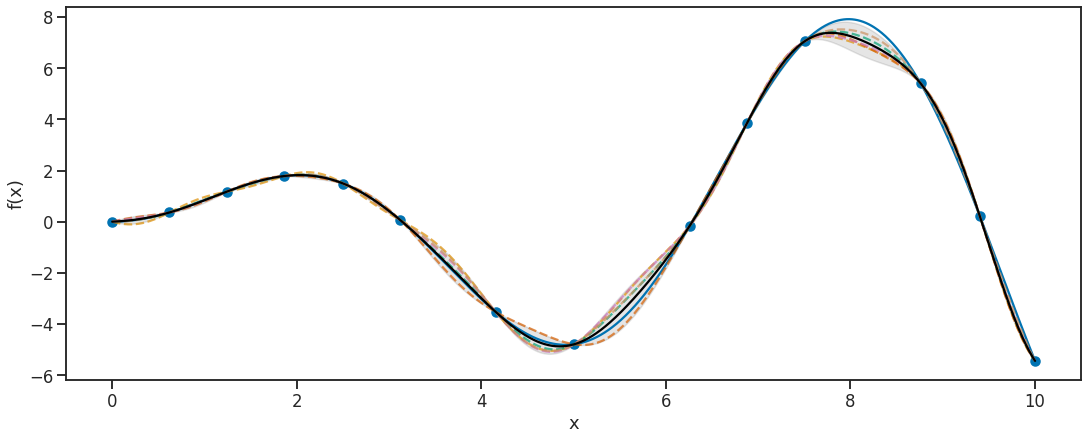

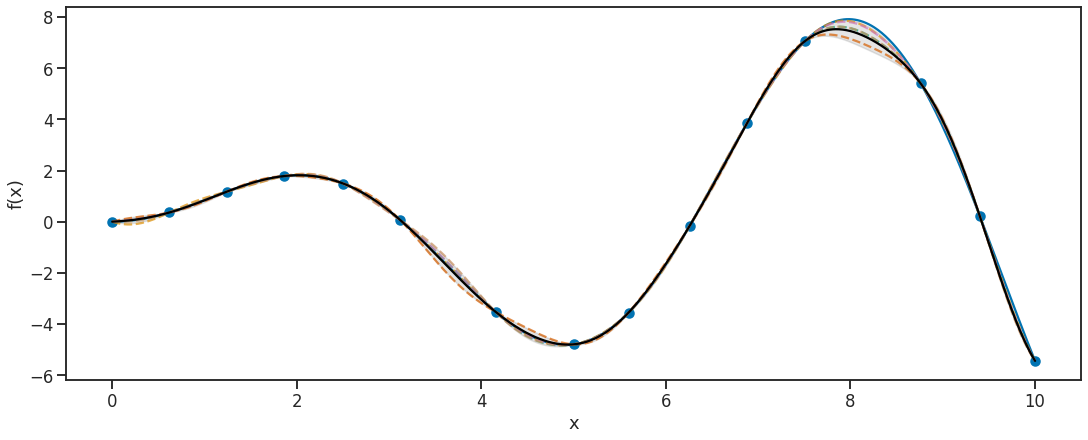

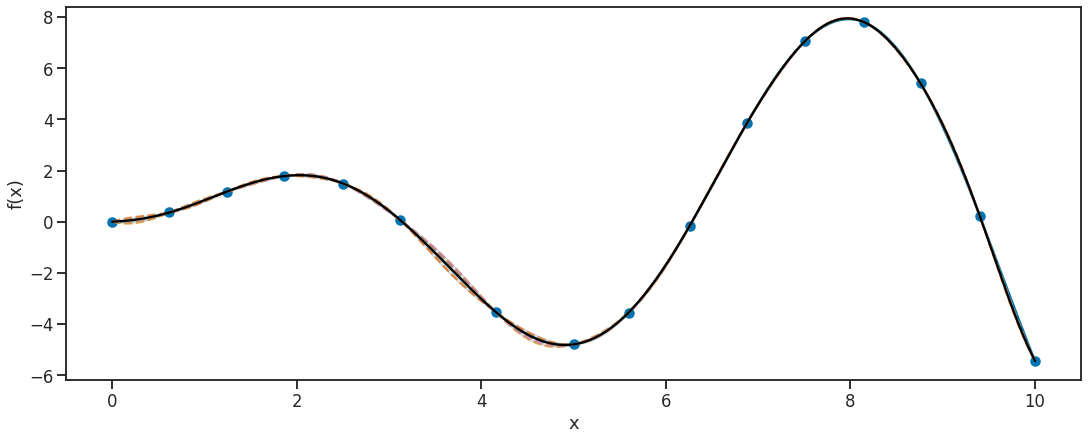

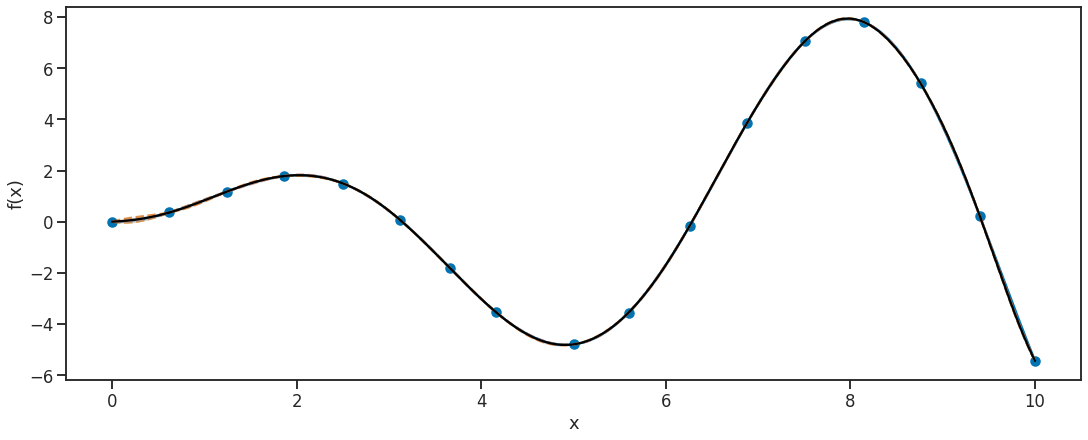

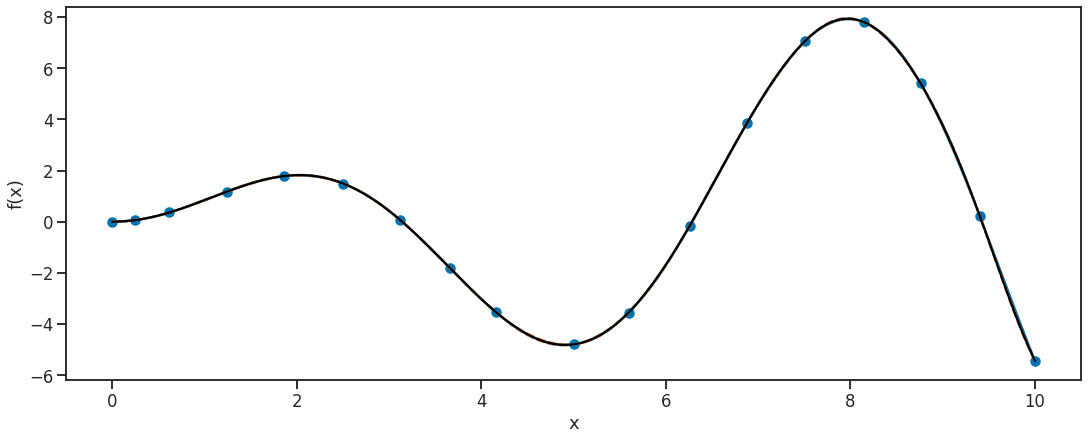

In [ ]:
y_stdmax = 1

while y_stdmax > 0.1:
    y_stdargmax = y_std.argmax()
    while y_stdargmax == 99 or y_stdargmax in training_indices:
        y_stdargmax = y_stdargmax-1
    y_stdmax = y_std.max()
    training_indices += [y_stdargmax]

    X_train, y_train = X[training_indices], y[training_indices]
    kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 2e2))
    gaussian_process = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=9)
    gaussian_process.fit(X_train, y_train)

    fig, ax = plt.subplots(figsize=(15, 6), constrained_layout=True)
    ax.plot(X, y, label="f(x) = xsin(x)")
    ax.scatter(X_train, y_train)
    y_mean, y_std = plot_gpr_samples(gaussian_process, n_samples=5, ax=ax)
    ax.set_ylim(-6.2, 8.4)

    fig.savefig(f"GP_{len(training_indices)}.png")

In [ ]:
training_indices

[250,
 500,
 750,
 0,
 62,
 124,
 999,
 186,
 625,
 875,
 312,
 415,
 939,
 687,
 559,
 814,
 366,
 25]

### 3.3. with noise

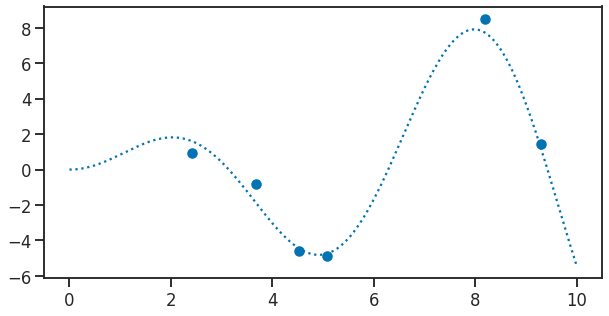

In [ ]:
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X, y, ":", label="f(x) = xsin(x)")
ax.scatter(X_train, y_train_noisy)

In [ ]:
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

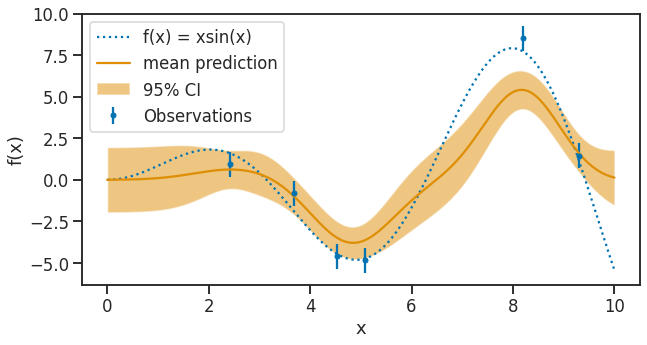

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X, y, ":", label="f(x) = xsin(x)")
ax.errorbar(X_train, y_train_noisy, noise_std, linestyle="none", c="C0",
            marker=".", markersize=10, label="Observations")

ax.plot(X, mean_prediction, label="mean prediction")
ax.fill_between(X.ravel(),
                mean_prediction-1.96*std_prediction,
                mean_prediction+1.96*std_prediction,
                fc="C1",
                alpha=0.5,
                label="95% CI")
ax.set(xlabel="x", ylabel="f(x)")
ax.legend()